## Demo of running the Classic Clawpack Fortran code and producing an animation of results

If you're viewing this notebook online and wish to run it, you can download it [from here](https://github.com/clawpack/doc/blob/master/doc/classic_demo.ipynb).

The environment variable CLAW should be set before starting the notebook:

In [1]:
import os
CLAW = os.environ['CLAW'] 
print CLAW

/Users/rjl/git/clawpack


Move to the desired directory:

In [2]:
os.chdir(CLAW + '/classic/examples/acoustics_1d_example1/')
print os.getcwd()


/Users/rjl/git/clawpack/classic/examples/acoustics_1d_example1


In [3]:
%%system
make output

['rm -f .output',
 'python /Users/rjl/git/clawpack/clawutil/src/python/clawutil/runclaw.py xclaw                          _output                     \\',
 '\tTrue                    False                     . False',
 'Reading data file: claw.data   ',
 '         first 5 lines are comments and will be skipped',
 ' running...',
 '  ',
 'Reading data file: setprob.data             ',
 '         first 5 lines are comments and will be skipped',
 'CLAW1EZ: Frame    1 output files done at time t =  0.5000D-01',
 '',
 'CLAW1EZ: Frame    2 output files done at time t =  0.1000D+00',
 '',
 'CLAW1EZ: Frame    3 output files done at time t =  0.1500D+00',
 '',
 'CLAW1EZ: Frame    4 output files done at time t =  0.2000D+00',
 '',
 'CLAW1EZ: Frame    5 output files done at time t =  0.2500D+00',
 '',
 'CLAW1EZ: Frame    6 output files done at time t =  0.3000D+00',
 '',
 'CLAW1EZ: Frame    7 output files done at time t =  0.3500D+00',
 '',
 'CLAW1EZ: Frame    8 output files done at time t =  0.4

In [4]:
%%system
make plots

['rm -f .plots',
 'python /Users/rjl/git/clawpack/visclaw/src/python/visclaw/plotclaw.py _output                     _plots                     setplot.py           ',
 'Importing setplot.setplot from /Users/rjl/git/clawpack/classic/examples/acoustics_1d_example1.',
 'Executed setplot successfully',
 'Will plot 17 frames numbered: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]',
 'Will make 1 figure(s) for each frame, numbered:  [1]',
 '',
 '-----------------------------------',
 '',
 '',
 'Creating html pages for figures...',
 '',
 "Directory '/Users/rjl/git/clawpack/classic/examples/acoustics_1d_example1/_plots' ",
 '    already exists, files may be overwritten ',
 'Now making png files for all figures...',
 '    Reading  Frame 0 at t = 0  from outdir = /Users/rjl/git/clawpack/classic/examples/acoustics_1d_example1/_output',
 'Frame 0 at time t = 0.0',
 '    Reading  Frame 1 at t = 0.05  from outdir = /Users/rjl/git/clawpack/classic/examples/acoustics_1d_example1/_output'

### To display a single frame:

showing  _plots/frame0002fig1.png


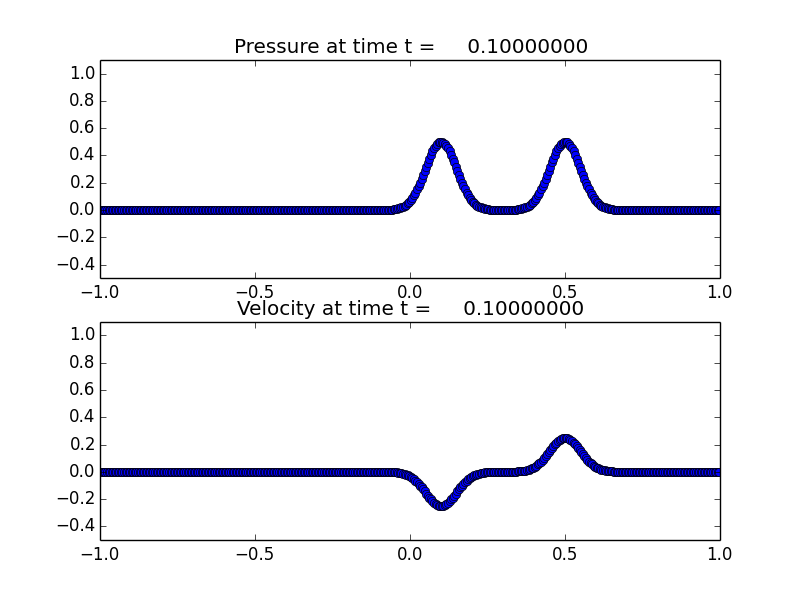

In [6]:
from IPython.display import Image
frameno = 2
fname = '_plots/frame00%sfig1.png' % str(frameno).zfill(2)
print "showing ",fname
i = Image(fname)
display(i)
    

### One way to display a sequence of plot images as an animation:

In [8]:
import glob
from matplotlib import image
from clawpack.visclaw.JSAnimation import IPython_display
from matplotlib import animation

figno = 1
fname = '_plots/*fig' + str(figno) + '.png'
filenames=sorted(glob.glob(fname))

fig = plt.figure()
im = plt.imshow(image.imread(filenames[0]))
def init():
    im.set_data(image.imread(filenames[0]))
    return im,

def animate(i):
    image_i=image.imread(filenames[i])
    im.set_data(image_i)
    return im,

animation.FuncAnimation(fig, animate, init_func=init,
                              frames=len(filenames), interval=20, blit=True)

### Another approach to animation:

Based on the pyclaw example at https://www.wakari.io/usermgmt/nb/pyclaw/Figure_7_2

This only works if the notebook is running, whereas the above animation should play from nbviewer.

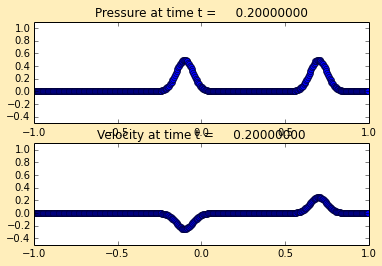

In [9]:
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

def solution_plot(n,setplot=None,outdir='./_output'):
    from clawpack.visclaw import data, frametools
    plotdata = data.ClawPlotData()
    plotdata.outdir = outdir
    if setplot is None:
        from setplot import setplot
    plotdata.setplot = setplot
    plotdata = frametools.call_setplot(setplot,plotdata)
    frametools.plotframe(n,plotdata)

for n in range(5):
    solution_plot(n)
    time.sleep(0.2)
    clear_output()
    f=plt.gcf()
    display(f)  
    plt.clf()